# Happiness Team : EDA Notebook - Mitchell Johnstone

The first step we need to see is to understand our data. Through visualizing the data, we should be able to see some basic trends we can then build off of later.

## Import / setup

In [1]:
import pandas as pd
import numpy as np
from dataset import *
from matplotlib import pyplot as plt

## Loading data
We plan on mostly drawing from the consistent yearly data. This allows us to get the data from the World Happiness Report's analysis.

In [2]:
df = get_consistent_yearly()
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1230 entries, 0 to 1229
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Country or region             1230 non-null   object
 1   Overall rank                  1230 non-null   int64 
 2   Score                         1230 non-null   object
 3   GDP per capita                1230 non-null   object
 4   Social support                1230 non-null   object
 5   Healthy life expectancy       1230 non-null   object
 6   Freedom to make life choices  1230 non-null   object
 7   Perceptions of corruption     1229 non-null   object
 8   Generosity                    1230 non-null   object
 9   year                          1230 non-null   int64 
dtypes: int64(2), object(8)
memory usage: 96.2+ KB
None


Country or region  Overall rank  Score GDP per capita Social support  \
0       Switzerland             1  7.587        1.39651        1.34951   
1           Iceland             2  7.561        1.30232        1.40223   
2           Denmark             3  7.527        1.32548        1.36058   
3            Norway             4  7.522          1.459        1.33095   
4            Canada             5  7.427        1.32629        1.32261   

  Healthy life expectancy Freedom to make life choices  \
0                 0.94143                      0.66557   
1                 0.94784                      0.62877   
2                 0.87464                      0.64938   
3                 0.88521                      0.66973   
4                 0.90563                      0.63297   

  Perceptions of corruption Generosity  year  
0                   0.41978    0.29678  2015  
1                   0.14145     0.4363  2015  
2                   0.48357    0.34139  2015  
3                   0.36503    0.34699  2015  
4                   0.32957    0.45811  2015

Only one null value in the corruption column, the rest are all there. Need to set the types properly, but it looks like we get the right data for most of the columns.

In [3]:
cat = ["Country or region", "Overall rank", "year"]
num = list(set(df.columns)-set(cat))
for col in num:
    df[col] = df[col].astype(str).str.replace(',','.')
df[cat] = df[cat].astype("category")
df[num] = df[num].astype("float64")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1230 entries, 0 to 1229
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   Country or region             1230 non-null   category
 1   Overall rank                  1230 non-null   category
 2   Score                         1230 non-null   float64 
 3   GDP per capita                1230 non-null   float64 
 4   Social support                1230 non-null   float64 
 5   Healthy life expectancy       1230 non-null   float64 
 6   Freedom to make life choices  1230 non-null   float64 
 7   Perceptions of corruption     1229 non-null   float64 
 8   Generosity                    1230 non-null   float64 
 9   year                          1230 non-null   category
dtypes: category(3), float64(7)
memory usage: 84.7 KB


The data is split into different features. What are they?
- `Country/Region`: The country that is being analyzed.
- `Overall Rank`: The ranking of the country in the happiness index.
- `Score`: The composite happiness score of the country (range: 0-10)
- `GDP per capita`: The GPD per capita score of the country
- `Social Support`: A likelihood of whether society would help someone in trouble
- `Healthy Life Expectancy`: A scaled version of the life expectancy of the country.
- `Freedom to make life choices`: How likely a person is to feel like they have freedom.
- `Perceptions of corruption`: A scale of how trustworthy the government and general businesses are
- `Generosity`: How much people give to charity, scaled by the country's GDP
- `year`: The year of the analysis of the country.


# Predicting the Score

We want score as our dependent variable (y). The rest of the data can be used as the independent variable matrix (X)

In [4]:
X = df[['GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Perceptions of corruption',
       'Generosity', 'year']]
y = df['Score']
    

How do each of the other columns relate to the score?

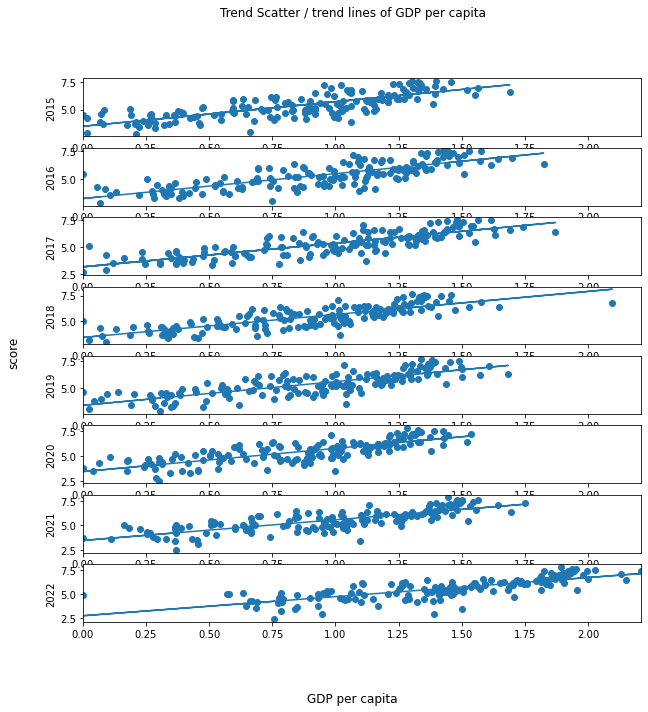

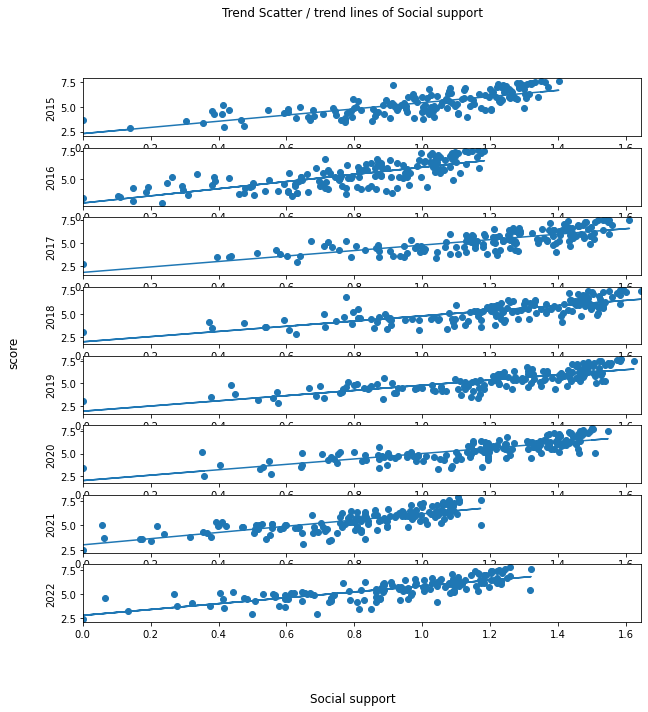

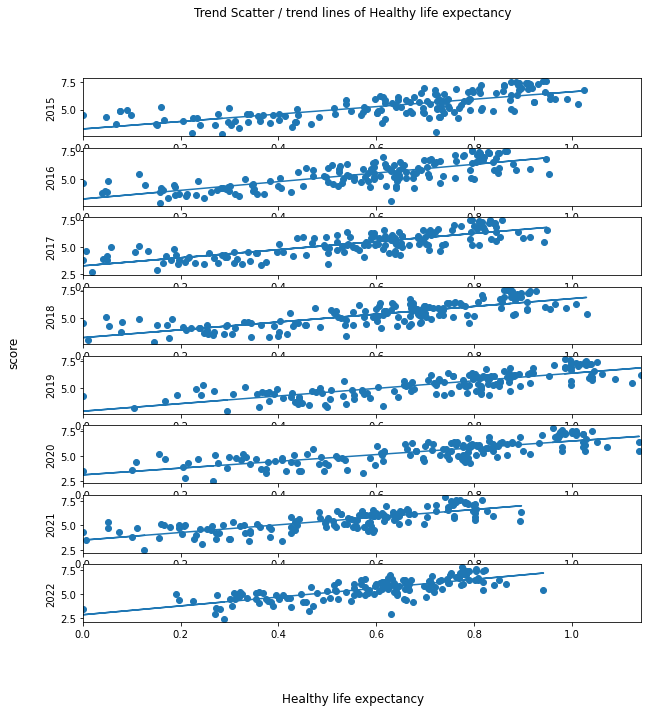

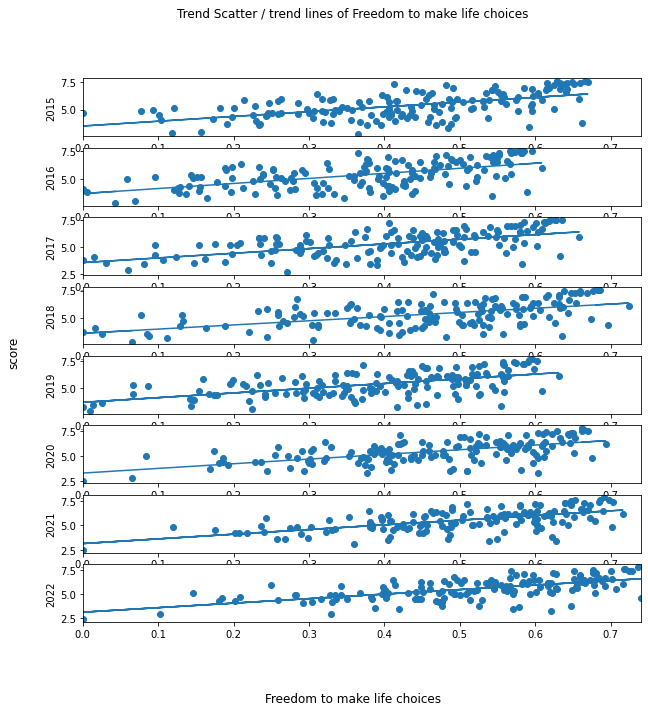

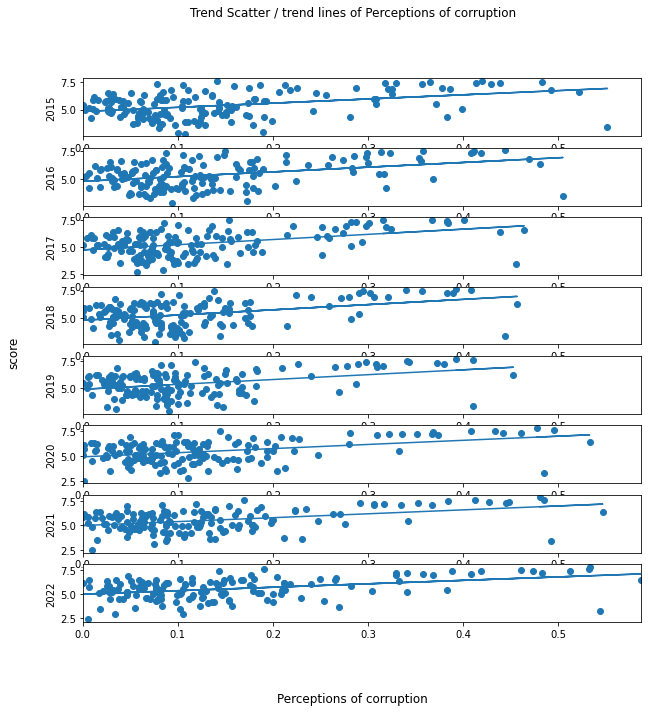

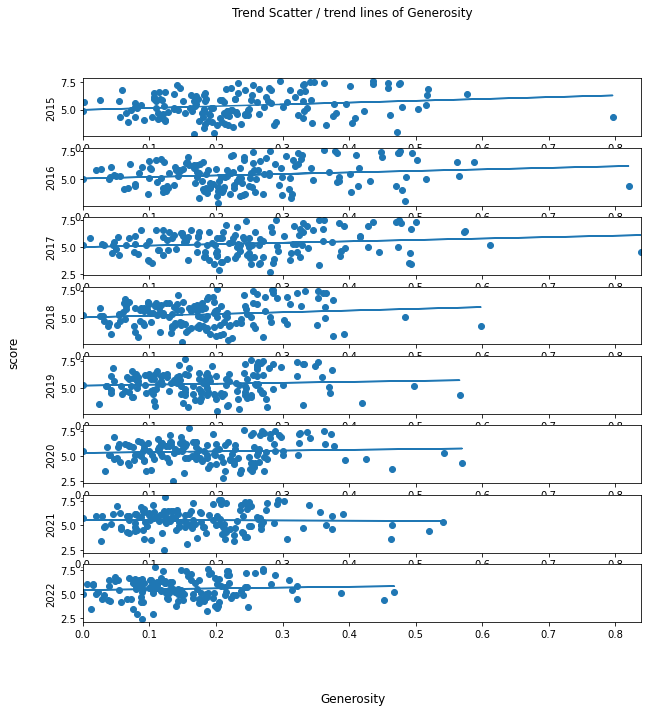

In [5]:
for col in X.columns:
    if col == 'year':
        continue
    fig, axs = plt.subplots(8,1)
    for ax, year in zip(axs, np.unique(df.year)):
        X_year = X[X['year'] == year]
        X_year_col = X_year[col]
        y_year = y[X['year'] == year][X_year_col.notna()]
        X_year_col = X_year_col[X_year_col.notna()]
        # print(col, year)
        # print(X_year)
        ax.scatter(X_year_col, y_year)
        #calculate equation for trendline
        z = np.polyfit(X_year_col, y_year, 1)
        p = np.poly1d(z)
        #add trendline to plot
        ax.plot(X_year_col, p(X_year_col))
        ax.set_ylabel(str(year))
        ax.set_xlim((X[col].min(), X[col].max()))
    fig.set_size_inches(10, 10)
    fig.suptitle("Trend Scatter / trend lines of " + col)
    fig.supxlabel(col)
    fig.supylabel("score")
    plt.show()

Most of them seem to be fairly positively correlated trend lines. They tend to stay consistent over the years as well. It's also interesting to see the graphs being skewed one way or another, with most of the points on the left or right side of the plot. The strongest looking correlation is for GDP, while the lowest correlated graph looks to be corruption.

What are the countries that have had the highest score yearly? (AKA, rank 1?)

In [6]:
df[df['Overall rank'] == 1]

Country or region Overall rank   Score  GDP per capita  Social support  \
0          Switzerland            1  7.5870        1.396510        1.349510   
158            Denmark            1  7.5260        1.441780        1.163740   
315             Norway            1  7.5370        1.616463        1.533524   
470            Finland            1  7.6320        1.305000        1.592000   
626            Finland            1  7.7690        1.340000        1.587000   
782            Finland            1  7.8087        1.285190        1.499526   
935            Finland            1  7.8420        1.446000        1.106000   
1084           Finland            1  7.8210        1.892000        1.258000   

      Healthy life expectancy  Freedom to make life choices  \
0                    0.941430                      0.665570   
158                  0.795040                      0.579410   
315                  0.796667                      0.635423   
470                  0.874000                      0.681000   
626                  0.986000                      0.596000   
782                  0.961271                      0.662317   
935                  0.741000                      0.691000   
1084                 0.775000                      0.736000   

      Perceptions of corruption  Generosity  year  
0                      0.419780    0.296780  2015  
158                    0.444530    0.361710  2016  
315                    0.315964    0.362012  2017  
470                    0.393000    0.202000  2018  
626                    0.393000    0.153000  2019  
782                    0.477857    0.159670  2020  
935                    0.481000    0.124000  2021  
1084                   0.534000    0.109000  2022

Interestingly, Finland has been consistent over the years. Maybe there's some sort of feedback loop in the score? That happy people tend to make happier people?